In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# EDA

In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
data['Classification'].nunique()

3

In [9]:
duplicates=data.duplicated()

In [10]:
print("Duplicate rows:\n",duplicates)

Duplicate rows:
 0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [11]:
data.drop_duplicates(inplace=True)
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [13]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
#The Classification column contains 3 types of species. Iris-setosa, Iris-versicolor, Iris-virginica. There fore we have to find mean value of the SL, SW, PL of each species with respect to their classification. 
data.groupby('Classification')['SL'].mean().round(1)

Classification
Iris-setosa        5.0
Iris-versicolor    5.9
Iris-virginica     6.6
Name: SL, dtype: float64

In [15]:
#In this step the value 5.0 which is obtained from the above step is given to the null values present in the SL column with the classification is Iris-setosa
data.loc[(data['Classification'] == 'Iris-setosa') & (data['SL'].isnull()), 'SL'] = 5.0
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
#In this step the value 5.9 which is obtained from the above step is given to the null values present in the SL column with the classification is Iris-versicolor
data.loc[(data['Classification'] == 'Iris-versicolor') & (data['SL'].isnull()), 'SL'] = 5.9
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
#In this step the value 6.6 which is obtained from the above step is given to the null values present in the SL column with the classification is Iris-virginica
data.loc[(data['Classification'] == 'Iris-virginica') & (data['SL'].isnull()), 'SL'] = 6.6
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [18]:
data.groupby('Classification')['SW'].mean().round(1)

Classification
Iris-setosa        3.4
Iris-versicolor    2.8
Iris-virginica     3.0
Name: SW, dtype: float64

In [19]:
data.loc[(data['Classification'] == 'Iris-setosa') & (data['SW'].isnull()), 'SW'] = 3.4
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
data.loc[(data['Classification'] == 'Iris-versicolor') & (data['SW'].isnull()), 'SW'] = 2.8
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
data.loc[(data['Classification'] == 'Iris-virginica') & (data['SW'].isnull()), 'SW'] = 3.4
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
data.groupby('Classification')['PL'].mean().round(1)

Classification
Iris-setosa        1.5
Iris-versicolor    4.3
Iris-virginica     5.6
Name: PL, dtype: float64

In [23]:
data.loc[(data['Classification'] == 'Iris-setosa') & (data['PL'].isnull()), 'PL'] = 1.5
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
data.loc[(data['Classification'] == 'Iris-versicolor') & (data['PL'].isnull()), 'PL'] = 4.3
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [25]:
data.loc[(data['Classification'] == 'Iris-virginica') & (data['PL'].isnull()), 'PL'] = 4.3
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.0,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,4.3,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
#to make sure no null values are left
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# CORRELATION AND HEATMAP

In [27]:
print(data.corr())

          SL        SW        PL        PW
SL  1.000000 -0.128242  0.870154  0.825441
SW -0.128242  1.000000 -0.428200 -0.349372
PL  0.870154 -0.428200  1.000000  0.953309
PW  0.825441 -0.349372  0.953309  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

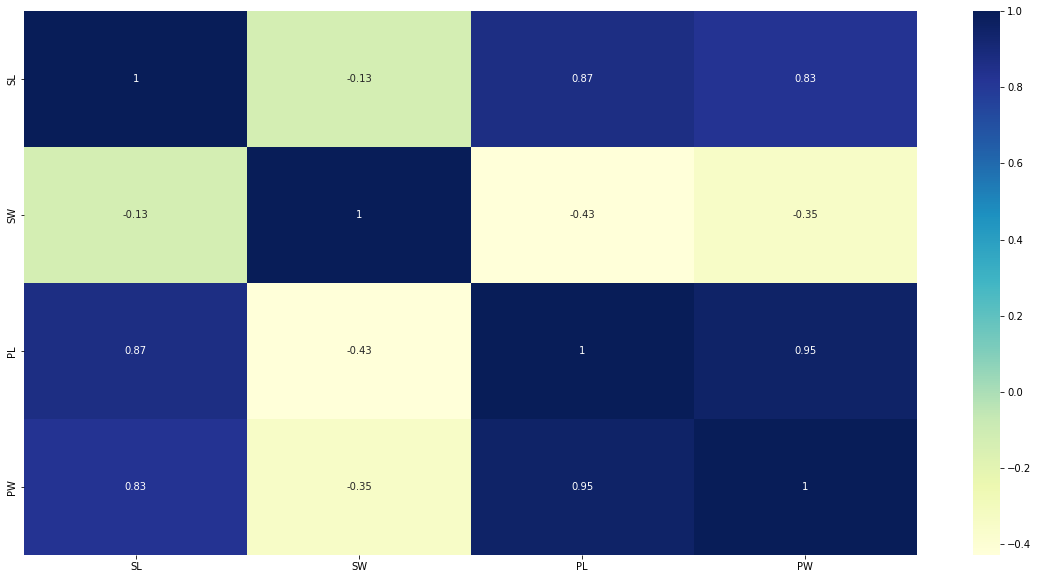

In [28]:
plt.subplots(figsize=(20,10))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show

# Label Encoding

In [29]:
 from sklearn.preprocessing import LabelEncoder
 le=LabelEncoder()

In [30]:
data['Classification']=le.fit_transform(data['Classification'])
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Treating Outliers


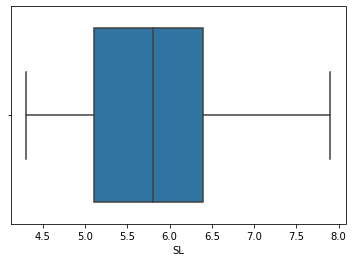

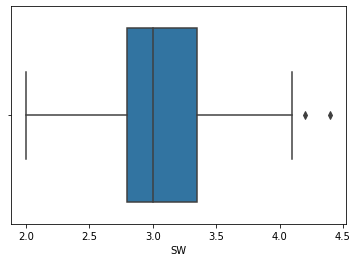

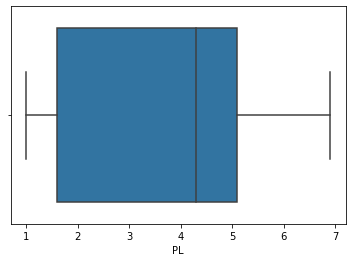

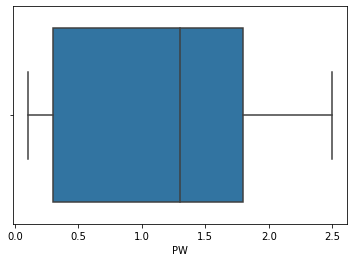

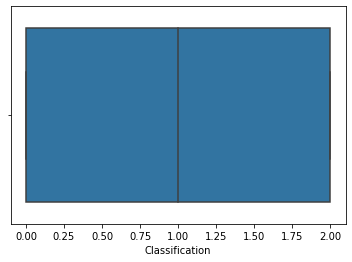

In [31]:
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

In [32]:
import scipy.stats as stats
IQR=stats.iqr(data.SW,interpolation='midpoint')
IQR

0.5499999999999998

In [33]:
Q1=data.SW.quantile(0.25)
Q3=data.SW.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [34]:
min_limit

1.975

In [35]:
max_limit

4.174999999999999

In [36]:
data.loc[data.SW>max_limit]

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,0
33,5.5,4.2,1.4,0.2,0


In [37]:
data.loc[data.SW<min_limit]

,SL,SW,PL,PW,Classification


In [38]:
#The outliers are replaced with the value 3.4 which is obtained while calculating for null values of the columns SW for the classification Iris-Setosa
data.loc[data['SW']>max_limit,'SW']=3.4
data.loc[data.SW>max_limit]

,SL,SW,PL,PW,Classification


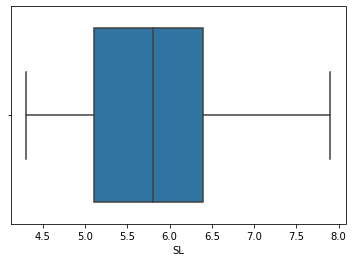

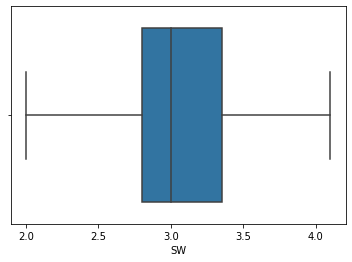

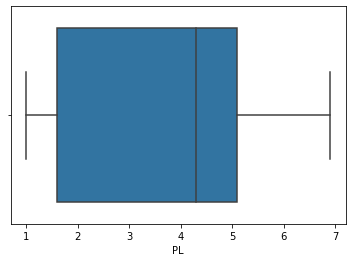

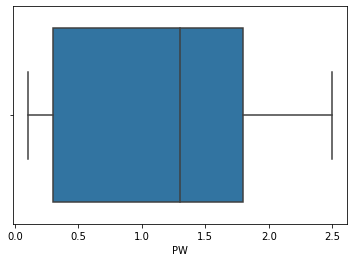

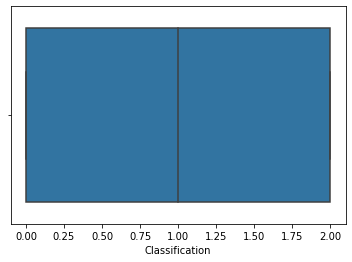

In [39]:
#Plotting the box plot to make sure no outliers are found in SW column
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

# Normalization and Scaling


In [40]:
x=data.drop(['Classification'],axis=1)
x

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.0,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,4.3,2.0
148,6.2,3.4,5.4,2.3


In [41]:
y=data[['Classification']]
y

,Classification
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled

,SL,SW,PL,PW
0,0.222222,0.714286,0.067797,0.041667
1,0.166667,0.476190,0.067797,0.041667
2,0.194444,0.571429,0.050847,0.041667
3,0.083333,0.523810,0.084746,0.041667
4,0.194444,0.761905,0.067797,0.041667
...,...,...,...,...
142,0.666667,0.476190,0.711864,0.916667
143,0.555556,0.238095,0.677966,0.750000
144,0.611111,0.476190,0.559322,0.791667
145,0.527778,0.666667,0.745763,0.916667


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

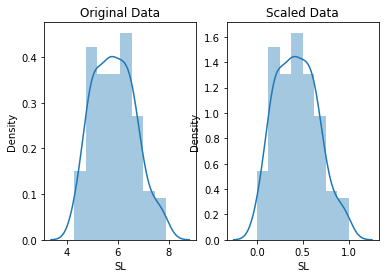

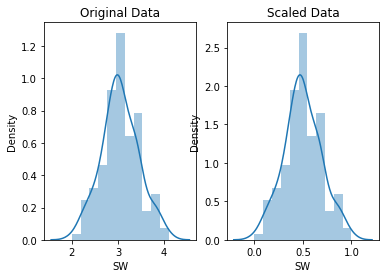

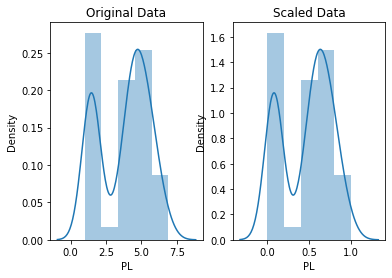

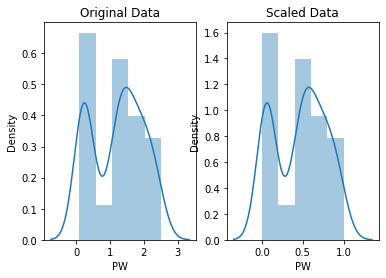

In [43]:
for i in x:
    fig,ax=plt.subplots(1,2)
    sns.distplot(x[i],ax=ax[0])
    ax[0].set_title("Original Data")
    sns.distplot(x_scaled[i],ax=ax[1])
    ax[1].set_title("Scaled Data")

In [44]:
from sklearn import preprocessing
df=preprocessing.normalize(x)
norm_df = pd.DataFrame(df,columns=x.columns)
norm_df

,SL,SW,PL,PW
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.822328,0.526290,0.213805,0.032893
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
142,0.721557,0.323085,0.560015,0.247699
143,0.729654,0.289545,0.579090,0.220054
144,0.756941,0.349357,0.500745,0.232905
145,0.674671,0.369981,0.587616,0.250281


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

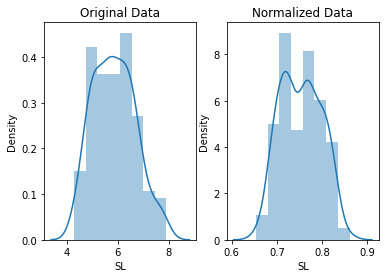

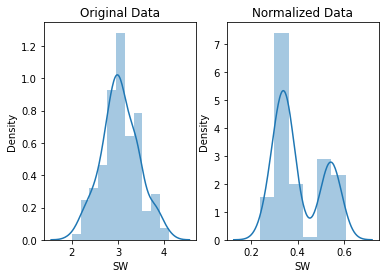

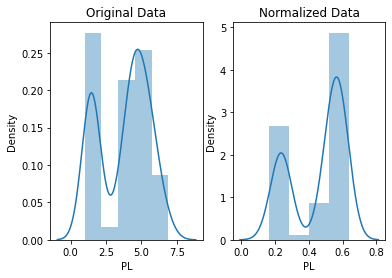

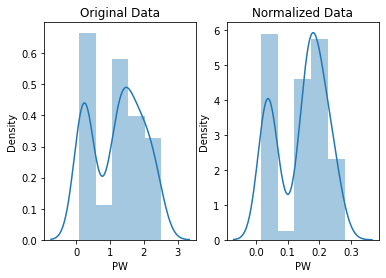

In [45]:
for i in x:
    fig,ax=plt.subplots(1,2)
    sns.distplot(x[i],ax=ax[0])
    ax[0].set_title("Original Data")
    sns.distplot(norm_df[i],ax=ax[1])
    ax[1].set_title("Normalized Data")

# Logistic Regression

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [48]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
y_pred=model.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('Precision : ',precision_score(y_test,y_pred,average='micro'))
print('Recall : ',recall_score(y_test,y_pred,average='micro'))
print('F1 score : ',f1_score(y_test,y_pred,average='micro'))

Accuracy :  0.9333333333333333
Precision :  0.9333333333333333
Recall :  0.9333333333333333
F1 score :  0.9333333333333333


In [51]:
y_pred

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [52]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]])

In [53]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [54]:
metric_k

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9333333333333333,
 0.9,
 0.9333333333333333,
 0.9]

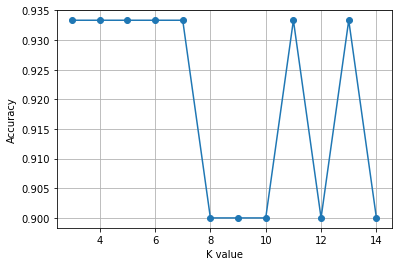

In [55]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [56]:
classifier = KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
metric_k.append(acc)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [57]:
print('Accuracy = ',accuracy_score(y_test,y_pred))
print('Precision = ', precision_score(y_test, y_pred, average='micro'))
print('Recall score:', recall_score(y_test, y_pred, average='micro'))
print('F1 score:', f1_score(y_test, y_pred, average='micro'))

Accuracy =  0.9333333333333333
Precision =  0.9333333333333333
Recall score: 0.9333333333333333
F1 score: 0.9333333333333333


In [58]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]])

In [59]:
#SVM, Kernal=Linear
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [60]:
y_pred_svm=svmclf.predict(x_test)

In [61]:
print('accuracy= ',accuracy_score(y_test,y_pred_svm))
print('Precision : ',precision_score(y_test,y_pred_svm,average='micro'))
print('Recall : ',recall_score(y_test,y_pred_svm,average='micro'))
print('F1 score : ',f1_score(y_test,y_pred_svm,average='micro'))

accuracy=  0.9333333333333333
Precision :  0.9333333333333333
Recall :  0.9333333333333333
F1 score :  0.9333333333333333


In [62]:
print(confusion_matrix(y_test,y_pred_svm))

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [63]:
#SVM, Kernal=RBF
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [64]:
y_pred_svm=svmclf.predict(x_test)
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))
print('Precision : ',precision_score(y_test,y_pred_svm,average='micro'))
print('Recall : ',recall_score(y_test,y_pred_svm,average='micro'))
print('F1 score : ',f1_score(y_test,y_pred_svm,average='micro'))

Accuracy =  0.9333333333333333
Precision :  0.9333333333333333
Recall :  0.9333333333333333
F1 score :  0.9333333333333333


In [65]:
#SVM, Kernal=Polynomial
svmclf=SVC(kernel='poly')
svmclf.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [66]:
y_pred_svm=svmclf.predict(x_test)

In [67]:
print('accuracy = ',accuracy_score(y_test,y_pred_svm))
print('Precision : ',precision_score(y_test,y_pred_svm,average='micro'))
print('Recall : ',recall_score(y_test,y_pred_svm,average='micro'))
print('F1 score : ',f1_score(y_test,y_pred_svm,average='micro'))

accuracy =  0.9666666666666667
Precision :  0.9666666666666667
Recall :  0.9666666666666667
F1 score :  0.9666666666666667


In [68]:
print(confusion_matrix(y_test,y_pred_svm))

[[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


In [69]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [70]:
y_pred_dt=dt_clf.predict(x_test)

In [71]:
print('accuracy= ',accuracy_score(y_test,y_pred_dt))
print('Precision : ',precision_score(y_test,y_pred_dt,average='micro'))
print('Recall : ',recall_score(y_test,y_pred_dt,average='micro'))
print('F1 score : ',f1_score(y_test,y_pred_dt,average='micro'))

accuracy=  0.9333333333333333
Precision :  0.9333333333333333
Recall :  0.9333333333333333
F1 score :  0.9333333333333333


In [72]:
print(confusion_matrix(y_test,y_pred_dt))

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [73]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train) 

<ipython-input-73-9ba3aae5706f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [74]:
y_pred_rf=rf_clf.predict(x_test)

In [75]:
print('accuracy = ',accuracy_score(y_test,y_pred_rf))
print('Precision : ',precision_score(y_test,y_pred_rf,average='micro'))
print('Recall : ',recall_score(y_test,y_pred_rf,average='micro'))
print('F1 score : ',f1_score(y_test,y_pred_rf,average='micro'))

accuracy =  0.9333333333333333
Precision :  0.9333333333333333
Recall :  0.9333333333333333
F1 score :  0.9333333333333333


In [76]:
print(confusion_matrix(y_test,y_pred_rf))

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [77]:
rf_clf=RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train,y_train) 

<ipython-input-77-8befc91963ef>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(x_train,y_train)


RandomForestClassifier(n_estimators=50)

In [78]:
y_pred_rf=rf_clf.predict(x_test)

In [79]:
print('accuracy = ',accuracy_score(y_test,y_pred_rf))
print('Precision : ',precision_score(y_test,y_pred_rf,average='micro'))
print('Recall : ',recall_score(y_test,y_pred_rf,average='micro'))
print('F1 score : ',f1_score(y_test,y_pred_rf,average='micro'))

accuracy =  0.9333333333333333
Precision :  0.9333333333333333
Recall :  0.9333333333333333
F1 score :  0.9333333333333333


In [80]:
#From the above classification models we can see that SVM Polynomial Kernal have the best accuracy with 0.96666. There fore for the given data SVM Polynomial Kernal is best.